In [1]:
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import eli5.sklearn
import warnings
import sklearn
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

%matplotlib inline

In [2]:
# използваме някои неща от лекцията
boston = load_boston()

In [3]:
boston_frame = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
boston_frame.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
boston_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
print(boston.DESCR[253:1222])

t.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $10


In [7]:
X = boston.data
y = boston.target

In [8]:
# нека разгледаме някои специфични статистики за целевия атрибут
# медиана
median = np.median(y)
print(median)

21.2


In [9]:
# средно
mean = np.mean(y)
print(mean)

22.532806324110677


In [10]:
# стандартно отклонение
std_dev = np.std(y)
print(std_dev)

9.188011545278203


In [11]:
# минимумът на у
min_price = np.amin(y)
print(min_price)

5.0


In [12]:
# максимумът на у
max_price = np.amax(y)
print(max_price)

50.0


In [13]:
# първи квартил q1
q1 = np.percentile(y, 25)
print(q1)

17.025


In [14]:
# трети квартил
q3 = np.percentile(y, 75)
print(q3)

25.0


Като обобщение може да направим следното: Най-ниската цента е 5к, а най-високата 50к, като средната цена е 22.5к, а половината са с цена под 21.2к. 75% от апартаментите са с цена по-ниска от 25к. Лесно се забелязва, че разпределението не е равномерно. Използваме min_price, max_price, median, q1, q3, за да направим петчисленото обощение и го визуализираме на boxplot.

In [15]:
def get_boxplot(stats):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
    axes.bxp([stats])
    return fig, axes

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc69ef2c160>)

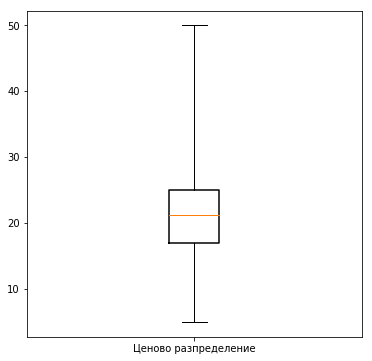

In [16]:
get_boxplot({"mean" : mean, "med": median, "q1": q1, "q3": q3, "iqr": q3 - q1, "whislo": 5, "whishi": 50, "label": "Ценово разпределение", "fliers": []})

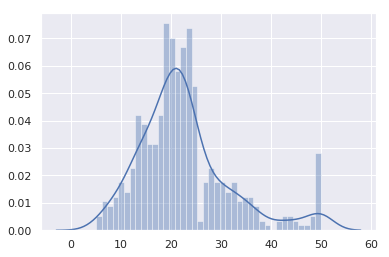

In [17]:
sns.set()
sns.distplot(boston.target, bins=40)
plt.show()

От тук виждаме, че разпределението е нормално, като има наличие на outliers.

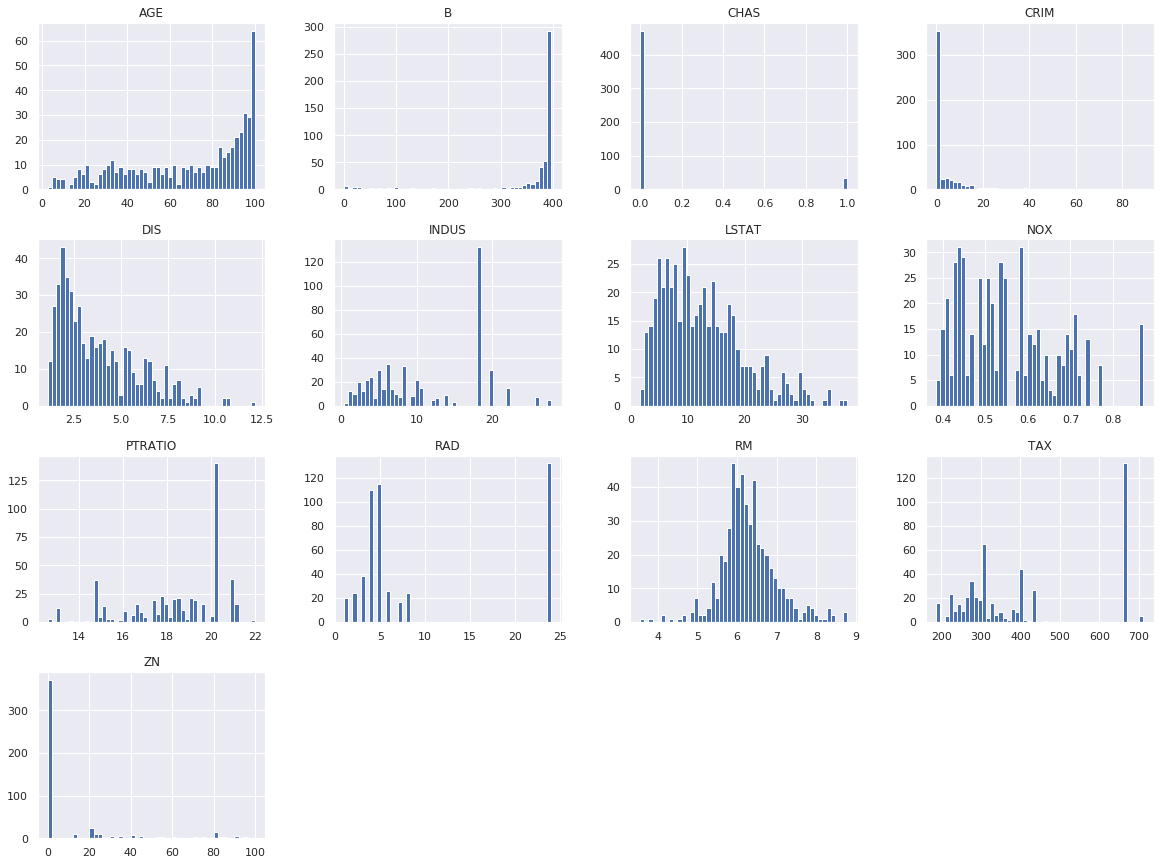

In [18]:
# един общ поглед върху разпределението на всичките атрибути
boston_frame.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.7508856358979673
test score:  0.6687594935356298


Това може да го използваме като baseline.

In [22]:
y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

24.291119474973673


Нека видим какво ще се получи с регуляризация.

In [23]:
model = Ridge().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("train:", train_score)
print("test: ", test_score)

train: 0.7487825119234438
test:  0.6662221670168519


Очаквано, в случая, резултатът е същият

In [24]:
model = Lasso().fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
features_used = np.sum(model.coef_ != 0)

print("train:        ", train_score)
print("test:         ", test_score)
print("features used: {}/{}".format(features_used, len(model.coef_)))

train:         0.6959153721670907
test:          0.6671453631686304
features used: 10/13


С оглед на това, че се използват по-малко фийчъри, а и моделът е прост, очаквано резултатът се влоши.

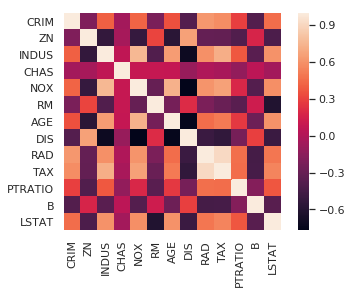

In [25]:
# нека видим корелационната матрица
sns.heatmap(boston_frame.corr(), square=True)
plt.show()

Между TAX и RAD се забелязва висока корелация, а също и между някои от останалите атрибути.

In [26]:
corr_matrix = boston_frame.corr()
corr_matrix["TAX"].sort_values(ascending=False)

TAX        1.000000
RAD        0.910228
INDUS      0.720760
NOX        0.668023
CRIM       0.582764
LSTAT      0.543993
AGE        0.506456
PTRATIO    0.460853
CHAS      -0.035587
RM        -0.292048
ZN        -0.314563
B         -0.441808
DIS       -0.534432
Name: TAX, dtype: float64

Този резултат потвърждава горното твърдение. Нека проверим за още няколко атрибута.

In [27]:
corr_matrix = boston_frame.corr()
corr_matrix["NOX"].sort_values(ascending=False)

NOX        1.000000
INDUS      0.763651
AGE        0.731470
TAX        0.668023
RAD        0.611441
LSTAT      0.590879
CRIM       0.420972
PTRATIO    0.188933
CHAS       0.091203
RM        -0.302188
B         -0.380051
ZN        -0.516604
DIS       -0.769230
Name: NOX, dtype: float64

In [28]:
corr_matrix = boston_frame.corr()
corr_matrix["AGE"].sort_values(ascending=False)

AGE        1.000000
NOX        0.731470
INDUS      0.644779
LSTAT      0.602339
TAX        0.506456
RAD        0.456022
CRIM       0.352734
PTRATIO    0.261515
CHAS       0.086518
RM        -0.240265
B         -0.273534
ZN        -0.569537
DIS       -0.747881
Name: AGE, dtype: float64

In [29]:
corr_matrix = boston_frame.corr()
corr_matrix["DIS"].sort_values(ascending=False)

DIS        1.000000
ZN         0.664408
B          0.291512
RM         0.205246
CHAS      -0.099176
PTRATIO   -0.232471
CRIM      -0.379670
RAD       -0.494588
LSTAT     -0.496996
TAX       -0.534432
INDUS     -0.708027
AGE       -0.747881
NOX       -0.769230
Name: DIS, dtype: float64

In [30]:
corr_matrix = boston_frame.corr()
corr_matrix["CHAS"].sort_values(ascending=False)

CHAS       1.000000
RM         0.091251
NOX        0.091203
AGE        0.086518
INDUS      0.062938
B          0.048788
RAD       -0.007368
TAX       -0.035587
ZN        -0.042697
LSTAT     -0.053929
CRIM      -0.055892
DIS       -0.099176
PTRATIO   -0.121515
Name: CHAS, dtype: float64

In [31]:
corr_matrix = boston_frame.corr()
corr_matrix["RM"].sort_values(ascending=False)

RM         1.000000
ZN         0.311991
DIS        0.205246
B          0.128069
CHAS       0.091251
RAD       -0.209847
CRIM      -0.219247
AGE       -0.240265
TAX       -0.292048
NOX       -0.302188
PTRATIO   -0.355501
INDUS     -0.391676
LSTAT     -0.613808
Name: RM, dtype: float64

In [32]:
# добавяме целевия атрибут към дейтафрейма
boston_frame['MEDV'] = boston.target
boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


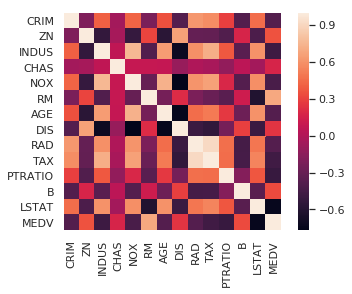

In [33]:
# отново ще проверим корелационната матрица, този път с участието и на целевия атрбиут
sns.heatmap(boston_frame.corr(), square=True)
plt.show()

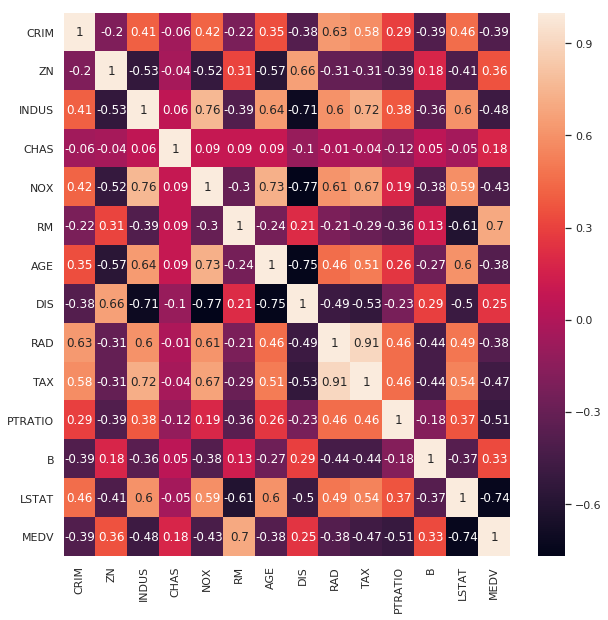

In [34]:
co_matrix = boston_frame.corr().round(2)
plt.subplots(figsize=(10,10))
sns.heatmap(data=co_matrix, annot=True)

От тук се вижда, че целевият атрибут MEDV има висока корелация с RM и LSTAT

Добавяме няколко нови атрибута

In [35]:
boston_frame['RM_LS'] = boston_frame['RM']/boston_frame['LSTAT']

In [36]:
boston_frame['AGE_LS'] = boston_frame['AGE']/boston_frame['LSTAT']

In [37]:
boston_frame['LS_INDUS'] = boston_frame['LSTAT']/boston_frame['INDUS']

In [38]:
boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_LS,AGE_LS,LS_INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.320281,13.092369,2.155844
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.702516,8.632385,1.292786
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.782878,15.161290,0.570014
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.380272,15.578231,1.348624
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.340901,10.168856,2.444954


In [39]:
corr_matrix = boston_frame.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV        1.000000
RM_LS       0.813685
RM          0.695360
AGE_LS      0.592200
ZN          0.360445
B           0.333461
DIS         0.249929
CHAS        0.175260
LS_INDUS    0.027215
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PTRATIO    -0.507787
LSTAT      -0.737663
Name: MEDV, dtype: float64

In [40]:
boston_frame_wout_target = boston_frame.drop('MEDV',1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(boston_frame_wout_target, y, test_size=0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8170751130048175
test score:  0.7632836221348454


In [42]:
model = Ridge().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("train:", train_score)
print("test: ", test_score)

train: 0.8157081567711484
test:  0.7591835667108731


In [43]:
model = Lasso().fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
features_used = np.sum(model.coef_ != 0)

print("train:        ", train_score)
print("test:         ", test_score)
print("features used: {}/{}".format(features_used, len(model.coef_)))

train:         0.7531648464327063
test:          0.7295638430172093
features used: 12/16


Очаквано резултатите се подобриха малко. Добавяме още атрибути.

In [44]:
boston_frame_wout_target['DIS_AGE'] = boston_frame_wout_target['AGE']/boston_frame_wout_target['DIS']

In [45]:
boston_frame_wout_target['DIS_TAX'] = boston_frame_wout_target['TAX']/boston_frame_wout_target['DIS']

In [46]:
boston_frame_wout_target['RATIO_LS'] = boston_frame_wout_target['PTRATIO']/boston_frame_wout_target['LSTAT']

In [47]:
boston_frame_wout_target.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RM_LS,AGE_LS,LS_INDUS,DIS_AGE,DIS_TAX,RATIO_LS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.320281,13.092369,2.155844,15.941320,72.371638,3.072289
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.702516,8.632385,1.292786,15.884520,48.720581,1.947484
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.782878,15.161290,0.570014,12.300940,48.720581,4.416873
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.380272,15.578231,1.348624,7.555013,36.620369,6.360544
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.340901,10.168856,2.444954,8.940649,36.620369,3.508443


In [48]:
X_train, X_test, y_train, y_test = train_test_split(boston_frame_wout_target, y, test_size=0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8273033897118975
test score:  0.7827328926086276


In [49]:
model = Ridge().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("train:", train_score)
print("test: ", test_score)

train: 0.8251342536485119
test:  0.7743561917524079


In [50]:
model = Lasso().fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
features_used = np.sum(model.coef_ != 0)

print("train:        ", train_score)
print("test:         ", test_score)
print("features used: {}/{}".format(features_used, len(model.coef_)))

train:         0.7657957748428277
test:          0.7472902304825864
features used: 12/19


Като цяло се забеляза подобрение на резултатите с добавянето на още 3 фийчъра.

Сега да пробваме с полиномни фийчъри

In [51]:
boston_copied_wt = boston_frame_wout_target.copy()

In [52]:
data = StandardScaler().fit_transform(boston_frame_wout_target)
data = PolynomialFeatures(degree=2, include_bias=False).fit_transform(data)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.9774443676471687
test score:  0.5421359250605813


Тук се наблюдава невероятен overfit, заради невероятно големия брой атрибути и малко количество данни. (505 реда и 209 атрибута).

In [54]:
model = Ridge(alpha=0.2).fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("train:", train_score)
print("test: ", test_score)

train: 0.9712887325179497
test:  0.9035623338294532


In [55]:
model = Lasso(alpha=0.002).fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
features_used = np.sum(model.coef_ != 0)

print("train:        ", train_score)
print("test:         ", test_score)
print("features used: {}/{}".format(features_used, len(model.coef_)))

train:         0.9681421090507492
test:          0.9117025954697586
features used: 179/209


/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


С добавените полиномни фийчъри резултатът се подобри значително при Lasso и Ridge регресиите.

Все пак се наблюдава overtfitting, но заради малко количество данни, няма как да го избегнем.

Да пробваме и с групиране на някои фийчъри.

In [56]:
boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_LS,AGE_LS,LS_INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.320281,13.092369,2.155844
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.702516,8.632385,1.292786
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.782878,15.161290,0.570014
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.380272,15.578231,1.348624
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.340901,10.168856,2.444954


In [57]:
f = boston_frame_wout_target.groupby('ZN').count()['CRIM']
s = boston_frame_wout_target.groupby('ZN').mean()['TAX']
cluster = pd.concat([f, s], axis=1)
cluster['ZN'] = cluster.index
cluster.columns = ['crim', 'tax_mean','zn']
cluster.describe()

,crim,tax_mean,zn
count,26.000000,26.000000,26.000000
mean,19.461538,304.298239,47.153846
std,72.051776,54.023114,29.098031
min,1.000000,216.000000,0.000000
25%,3.000000,271.785714,22.750000
50%,4.000000,299.000000,37.500000
75%,6.750000,331.500000,73.750000
max,372.000000,449.182796,100.000000


In [58]:
cluster1 = cluster[cluster.tax_mean<299]
cluster1.index

Float64Index([17.5, 18.0, 20.0, 21.0, 25.0, 28.0, 33.0, 35.0, 40.0, 52.5, 80.0,
              90.0, 100.0],
             dtype='float64', name='ZN')

In [59]:
cluster_temp = cluster[cluster.tax_mean >= 299]
cluster2 = cluster_temp[cluster_temp.crim <4]
cluster2.index

Float64Index([34.0, 55.0, 70.0, 75.0, 82.5, 85.0], dtype='float64', name='ZN')

In [60]:
cluster3 = cluster_temp[cluster_temp.crim >=4]
cluster3.index

Float64Index([0.0, 12.5, 22.0, 30.0, 45.0, 60.0, 95.0], dtype='float64', name='ZN')

In [61]:
def get_group(x):
    if x in cluster1.index:
        return 0
    elif x in cluster2.index:
        return 1
    else:
        return 2


boston_copied_wt['grp'] = boston_copied_wt.ZN.apply(get_group)

In [62]:
boston_copied_wt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RM_LS,AGE_LS,LS_INDUS,DIS_AGE,DIS_TAX,RATIO_LS,grp
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.320281,13.092369,2.155844,15.941320,72.371638,3.072289,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.702516,8.632385,1.292786,15.884520,48.720581,1.947484,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.782878,15.161290,0.570014,12.300940,48.720581,4.416873,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.380272,15.578231,1.348624,7.555013,36.620369,6.360544,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.340901,10.168856,2.444954,8.940649,36.620369,3.508443,2


Тестваме дали с още един добавен фийчър ще подобрим резултата.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(boston_copied_wt, y, test_size=0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8273040405261851
test score:  0.7829372850973784


Забелязва се леко подобрение, при последната линейна регресия получихме:

train score: 0.8170751130048175
test score:  0.7632836221348454

Като цяло добавянето на този фийчър не е много сполучлив, но все пак спрямо baseline моделът е с доста по-добър резултат. При baseline имахме:

train score: 0.7508856358979673
test score:  0.6687594935356298

In [64]:
boston_copied_wt.shape

(506, 20)